In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Fraud.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Missing Values

In [4]:
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


---
## Description
For the fraud detection model, we typically use supervised learning algorithms suited for classification tasks. Here’s an example using a Random Forest Classifier:

Model Choice: Random Forest was chosen due to its robustness and ability to handle imbalanced datasets and its capability of providing feature importance scores.

Data Preparation: The dataset was split into training and validation sets, and SMOTE was used to handle class imbalance.

Feature Engineering: New features were created to capture potential patterns indicative of fraud.

Model Training: The model was trained on the resampled training set.

Evaluation: The model was evaluated using precision, recall, F1-score, and AUC-ROC.

---
## Preprocessing

In [8]:
# splitting account number and merchant/customer status

df['nameOrig_alpha'] = df['nameOrig'].str.extract('([A-Za-z]+)', expand=False)
df['nameOrig_num'] = df['nameOrig'].str.extract('(\d+)', expand=False).astype(int)

df['nameDest_alpha'] = df['nameDest'].str.extract('([A-Za-z]+)', expand=False)
df['nameDest_num'] = df['nameDest'].str.extract('(\d+)', expand=False).astype(int)

df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig_alpha,nameOrig_num,nameDest_alpha,nameDest_num
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,C,1231006815,M,1979787155
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,C,1666544295,M,2044282225
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,C,1305486145,C,553264065
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,C,840083671,C,38997010
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,C,2048537720,M,1230701703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,C,786484425,C,776919290
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,C,1529008245,C,1881841831
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,C,1162922333,C,1365125890
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,C,1685995037,C,2080388513


In [9]:
df = df.drop(["nameOrig","nameDest"],axis=1)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig_alpha,nameOrig_num,nameDest_alpha,nameDest_num
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,C,1231006815,M,1979787155
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,C,1666544295,M,2044282225
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,C,1305486145,C,553264065
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,C,840083671,C,38997010
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,C,2048537720,M,1230701703


In [40]:
Y = df["isFraud"]
X = df.drop(columns=["isFraud"])

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

In [43]:
object_cols = [i for i in X.columns if X[i].dtype=="object"]
object_cols

['type', 'nameOrig_alpha', 'nameDest_alpha']

In [45]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X_train[object_cols] = encoder.fit_transform(X_train[object_cols])
X_test[object_cols] = encoder.transform(X_test[object_cols])

In [47]:
from imblearn.over_sampling import SMOTE
# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, Y_train)

In [48]:
X_train_res = X_train_res.drop(columns=["isFlaggedFraud"])
X_test = X_test.drop(columns=["isFlaggedFraud"])

## Model Training

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [50]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "Accredian_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)


## Accuracy and Model Report

In [51]:
y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))
print("AUC-ROC:", roc_auc_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906336
           1       0.63      0.94      0.75      2450

    accuracy                           1.00   1908786
   macro avg       0.82      0.97      0.88   1908786
weighted avg       1.00      1.00      1.00   1908786

AUC-ROC: 0.969849736963088
[[1904985    1351]
 [    146    2304]]


## Confusion Matrix

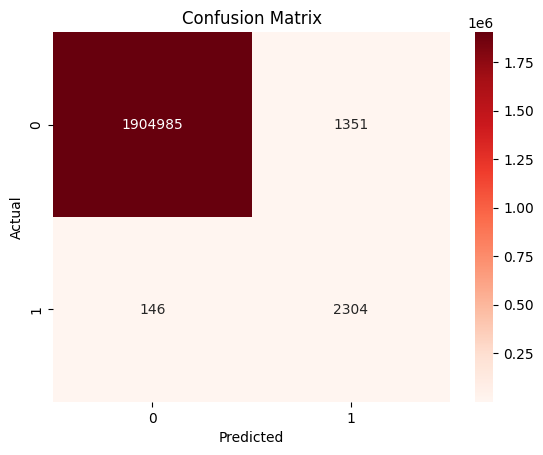

In [53]:
import seaborn as sns

conf_matrix = confusion_matrix(Y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Feature Importance

In [54]:
importances = model.feature_importances_
features = X_train_res.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

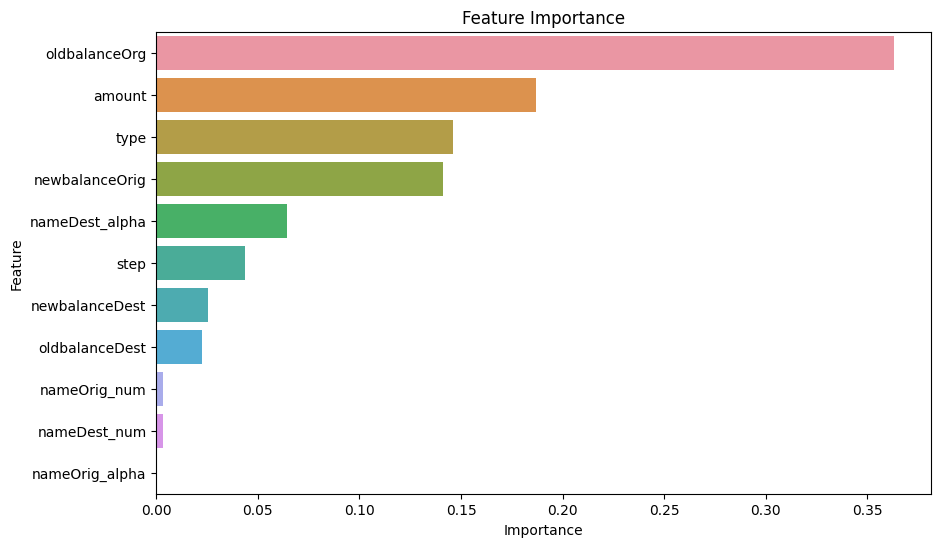

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

---
## Insights

In [10]:
fraudulent_transactions = df[df['isFraud'] == 1]

# Display the oldbalanceOrg of these fraudulent transactions
print(fraudulent_transactions['oldbalanceOrg'])

2              181.00
3              181.00
251           2806.00
252           2806.00
680          20128.00
              ...    
6362615     339682.13
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Name: oldbalanceOrg, Length: 8213, dtype: float64


In [15]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig_alpha,nameOrig_num,nameDest_alpha,nameDest_num
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,C,1231006815,M,1979787155
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,C,1666544295,M,2044282225
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,C,1305486145,C,553264065
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,C,840083671,C,38997010
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,C,2048537720,M,1230701703


## Gained Insights:

-> Pattern of Fraudulent Transactions: It has been observed that fraudulent transactions often occur in pairs. Specifically, a fraudulent transfer is followed immediately by a corresponding cash-out transaction.

-> Transaction Consistency: For instance, if there is a transfer transaction (T1) of a certain amount, such as 181, it is immediately followed by a cash-out transaction of the same amount.

## Proposition

-> Timing and Amounts: Monitoring the timing and amounts of transactions can provide further insights. Transactions occurring in quick succession, especially for the same amount, should be flagged for further investigation.

-> Structured Fraud Behavior: The consistent pairing of transfer and cash-out transactions indicates a structured and deliberate pattern of fraud. Fraudsters seem to transfer funds and then quickly withdraw them, aiming to minimize the risk of detection and maximize the speed of asset liquidation.
___

In [19]:
fraudulent_transactions["nameDest_alpha"].unique()

array(['C'], dtype=object)

In [13]:
fraudulent_transactions["nameOrig_alpha"].unique()

array(['C'], dtype=object)

## Gained Insights:

-> Initiation of Fraudulent Transactions: Every fraudulent transaction starts from a customer account, denoted by 'C'. This means that the initial transfer in a fraudulent sequence always originates from a customer account.

-> Recipient Accounts: The recipients of these fraudulent transactions are also customer accounts, denoted by 'C'.

## Proposition

-> Originating Account Type: Knowing that fraudulent transactions always start from customer accounts provides a key focal point for fraud detection systems. Enhanced monitoring and security measures can be implemented specifically for transactions initiated by customer accounts.

-> Uniformity in Recipient Accounts: Since both the initiators and recipients of fraudulent transactions are customer accounts, fraud detection systems can be fine-tuned to monitor customer-to-customer transactions more closely. This uniformity simplifies the detection rules and focuses the analysis on a specific subset of transactions.
